# Anaylsis Data of Experiment Menu planning

In here we compute the DQI-I score adapted to our need for each participants.

## Variety Scores

Variety score relies on computing number of serving per day. Since we asked our participants to plan eithe only dinner or lunch and dinners, we need to adjust the computation to account for mssing information and normalize the socres for each participants in order to be able to compare results.
To do so, we rely on https://www.researchgate.net/figure/Proportion-of-daily-energy-intake-at-breakfast-lunch-dinner-and-snacks-in-children_fig3_304250530 which indicates that:
 - Lunch represent 25% of Daily energy intake in US adults
 - Dinner represent 38% of daily intake of US adults
 
 After computing servings per person on each food group or protein categroy, we will aggregate the values across the recipes selected and then divide by the number of days. Once done, we will renormalize the result to the number of meal per day we asked people to select:
  - For people having to select on 5 meals, we will see if the toal score is above 0.38 to count 1 serving or not for food group
  - For peopple having to select 10 meals, we will see if the total score is above 0.63 to count 1 serving or not for food group
  
For the food categories, since the protein source counts if half the serving size is reached, we will use 0.38/2 and 0.63/2 has the criteria.

In [148]:
import pandas as pd
import numpy as np

In [149]:
tmp_recipes_servings_variety = pd.read_csv('../../Python/Recipes/ExcelFiles_distributions/List_ingredients_weights_servings_food_groups_per_person.csv')

In [150]:
tmp_recipes_servings_variety['serving_per_person']=pd.to_numeric(tmp_recipes_servings_variety['serving_per_person'])
pivot_variety_foodgroups=tmp_recipes_servings_variety.pivot_table(index = 'recipe', columns = 'Food_Groups', values = 'serving_per_person', aggfunc=sum)
pivot_variety_foodgroups = pivot_variety_foodgroups.fillna(0)
recipes_variety_food_groups = pivot_variety_foodgroups

In [151]:
pivot_variety_categories=tmp_recipes_servings_variety.pivot_table(index = 'recipe', columns = 'category', values = 'serving_per_person', aggfunc=sum)
pivot_variety_categories = pivot_variety_categories.fillna(0)
pivot_variety_categories.head()
recipes_variety_categories = pivot_variety_categories

In [152]:
recipes_variety = pivot_variety_foodgroups.join(pivot_variety_categories, lsuffix = '_food_group', rsuffix = '_category')

In [153]:
recipes_variety.head()

,dairy_beans,fruits_food_group,grains_food_group,meat_poultry_fish_egg,others,vegetables,beans,cheese,cream,dried fruits,...,grains_category,meat,milk,nuts,other,poultry,pulses,tofu,vegetable,yogurt
recipe,,,,,,,,,,,,,,,,,,,,,
"""Wine & Cheese"" Burger",0.472492,0.0,0.0,2.834952,0.0,1.111327,0.0,0.472492,0.0,0.0,...,0.0,2.834952,0.0,0.0,0.0,0.0,0.0,0.0,1.111327,0.0
15 minute lasagne,4.631374,0.0,0.0,2.083333,0.0,0.266667,0.0,4.631374,0.0,0.0,...,0.0,2.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.266667,0.0
A Lot Like Lasagna,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
A.1. Cajun Prime Rib Steak,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Almond & honey dairy-free ice cream,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [154]:
recipes_variety.to_csv('recipes_variety_servings_per_persons.csv')

## Adequacy

Adequacy is computed using % of daily recommendations. As for variety, we will use the 0.38 and 0.63 rebasing to compute the values of daily recommendations.

In [155]:
recipes_adequacy=pd.read_csv('../../Python/Recipes/ExcelFiles_distributions/recipes_ADR_final.csv')

In [156]:
#recipes_adequacy.to_csv('recipes_adequacy.csv')

In [157]:
recipes_adequacy['vegetable'] = pd.to_numeric(recipes_adequacy['vegetable'])

## Moderation

For fats, which are computed as % of total energy consumed per day, we will use % of ttoal energy of recieps selected per day.
For the other nutrients, since we use the value g/d, we will rebase the thresholds using the 38% and 63% rebasing values to rebase our norms.

In [158]:
recipes_moderation_fat_cholesterol_sodium=pd.read_csv('../../Python/Recipes/ExcelFiles_distributions/recipes_moderation_fat_cholesterol_sodium.csv')

In [159]:
#recipes_moderation_fat_cholesterol_sodium.to_csv('recipes_moderation_fat_cholesterol_sodium.csv')

The empty calory food cannot be computed as we do not have the energy at the ingredient level.

## Overall Balance

In [160]:
recipes_balance=pd.read_csv('../../Python/Recipes/ExcelFiles_distributions/recipes_balance.csv')

In [162]:
#recipes_balance.to_csv('recipes_balance.csv')

## Reading Data from Experiment

In [163]:
import pandas as pd
import glob

all_files = glob.glob("./Data_experiment/data_exp_32771-v4_task*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

Data_experiment_raw = pd.concat(li, axis=0, ignore_index=True)

In [16]:
#Data_experiment_raw.to_csv('Data_experiment_raw.csv')

In [258]:
Data_experiment=Data_experiment_raw[['Participant Private ID', 'Task Name', 'Zone Name', 'Response']]
Data_experiment.columns = [c.replace(' ', '_') for c in Data_experiment.columns]
Data_experiment=Data_experiment[Data_experiment.Zone_Name.str.startswith('Recipe').fillna(False)]

In [259]:
Participant_to_remove = Data_experiment[Data_experiment.Response == 'X'].Participant_Private_ID.unique()  #removing participants wiht missing entries
Data_experiment = Data_experiment[~Data_experiment.Participant_Private_ID.isin(Participant_to_remove)]

In [166]:
index_recipes = pd.read_csv('recipe_index_experiment.csv')
Data_experiment['Response'] = Data_experiment['Response'].astype(int)
Data_experiment = Data_experiment.join(index_recipes.set_index('index_experiment'),on = 'Response')
#Data_experiment.to_csv('Data_experiment_recipes.csv')

In [167]:
Data_experiment.insert(5,'nb_meals',0)
Data_experiment.insert(6,'time',0)
Data_experiment.insert(7,'time_per_meals',0)

In [168]:
Data_experiment['time']=pd.to_numeric(Data_experiment.Task_Name.str.slice(stop=1))
Data_experiment.loc[Data_experiment.Task_Name.str.contains('10meal'),'nb_meals'] = 10
Data_experiment.loc[Data_experiment.Task_Name.str.contains('5meal'),'nb_meals'] = 5
Data_experiment['time_per_meals'] = Data_experiment.time.div(Data_experiment.nb_meals)*60

In [169]:
Data_experiment

,Participant_Private_ID,Task_Name,Zone_Name,Response,recipe,nb_meals,time,time_per_meals
6,2338776.0,4min_10meals_lunch_dinner_days,Recipe1Value,27,Fish Tacos,10,4,24.0
7,2338776.0,4min_10meals_lunch_dinner_days,Recipe2Value,44,Cajun-Spiced Turkey,10,4,24.0
8,2338776.0,4min_10meals_lunch_dinner_days,Recipe4Value,17,Slow-Cooker Chicken Fettuccine Alfredo,10,4,24.0
9,2338776.0,4min_10meals_lunch_dinner_days,Recipe5Value,48,Lamb Sausages,10,4,24.0
10,2338776.0,4min_10meals_lunch_dinner_days,Recipe3Value,3,Beef Tacos,10,4,24.0
...,...,...,...,...,...,...,...,...
1644,2384762.0,1min_5meals_dinner_days,Recipe1Value,2,Beef Goulash,5,1,12.0
1645,2384762.0,1min_5meals_dinner_days,Recipe2Value,56,Lentil Curry Stew,5,1,12.0
1646,2384762.0,1min_5meals_dinner_days,Recipe4Value,71,Cheats Chicken And Bean Soup,5,1,12.0
1647,2384762.0,1min_5meals_dinner_days,Recipe5Value,3,Beef Tacos,5,1,12.0


In [23]:
#Data_experiment.to_csv('Data_experiment_recipes.csv')

## Variety Experiment

We link our table of Variety components per recipes to experiment data.

In [24]:
#Data_experiment = pd.read_csv('Data_experiment_recipes.csv')

In [170]:
Data_experiment_variety_food_groups = Data_experiment.join(recipes_variety_food_groups,on = 'recipe')

In [171]:
Data_experiment_variety_food_groups.head()

,Participant_Private_ID,Task_Name,Zone_Name,Response,recipe,nb_meals,time,time_per_meals,dairy_beans,fruits,grains,meat_poultry_fish_egg,others,vegetables
6,2338776.0,4min_10meals_lunch_dinner_days,Recipe1Value,27,Fish Tacos,10,4,24.0,0.360,0.311250,0.0,2.590000,0.0,0.383333
7,2338776.0,4min_10meals_lunch_dinner_days,Recipe2Value,44,Cajun-Spiced Turkey,10,4,24.0,0.000,0.000000,0.0,9.827835,0.0,0.355052
8,2338776.0,4min_10meals_lunch_dinner_days,Recipe4Value,17,Slow-Cooker Chicken Fettuccine Alfredo,10,4,24.0,4.768,0.000000,0.0,1.700000,0.0,0.530000
9,2338776.0,4min_10meals_lunch_dinner_days,Recipe5Value,48,Lamb Sausages,10,4,24.0,0.000,0.011632,0.0,2.333333,0.0,0.000000
10,2338776.0,4min_10meals_lunch_dinner_days,Recipe3Value,3,Beef Tacos,10,4,24.0,0.000,0.000000,0.0,3.779936,0.0,0.406667


In [172]:
tmp2 = Data_experiment_variety_food_groups.groupby(['Participant_Private_ID']).agg(
    fruits_food_groups=pd.NamedAgg(column ='fruits',aggfunc=sum),
    dairy_beans_food_groups=pd.NamedAgg(column = 'dairy_beans', aggfunc=sum),
    grains_food_groups=pd.NamedAgg(column='grains', aggfunc=sum),
    meat_egg_fish_food_groups=pd.NamedAgg(column='meat_poultry_fish_egg', aggfunc=sum),
    vegetables_food_groups=pd.NamedAgg(column = 'vegetables', aggfunc=sum),
    nb_meals=pd.NamedAgg(column = 'nb_meals', aggfunc=np.mean)
)
    

In [173]:
tmp2.head()

,fruits_food_groups,dairy_beans_food_groups,grains_food_groups,meat_egg_fish_food_groups,vegetables_food_groups,nb_meals
Participant_Private_ID,,,,,,
2338561.0,0.197743,11.065960,0.000000,8.556515,15.635836,10
2338657.0,0.141667,12.953592,0.000000,4.867436,3.372739,5
2338682.0,0.095312,4.078405,0.000000,9.985086,1.351889,5
2338688.0,0.141667,5.161977,0.000000,8.174881,4.285933,5
2338699.0,3.085729,0.584902,2.591667,14.805006,17.029854,10


In [174]:
tmp2.loc[tmp2['nb_meals'] == 10, 'Threshold_serving'] =0.63*5    #using fact that Lunch and Dinner represent 0.63% of energy intake
tmp2.loc[tmp2['nb_meals'] == 5, 'Threshold_serving'] =0.38*5    # using the fact that dinner represent 0.38% of energy intake

In [175]:
tmp2.loc[tmp2['fruits_food_groups'] < tmp2['Threshold_serving'], 'fruits_group_count'] = 0
tmp2.loc[tmp2['fruits_food_groups'] >= tmp2['Threshold_serving'], 'fruits_group_count'] = 1
tmp2.loc[tmp2['dairy_beans_food_groups'] < tmp2['Threshold_serving'], 'dairy_beans_group_count'] = 0
tmp2.loc[tmp2['dairy_beans_food_groups'] >= tmp2['Threshold_serving'], 'dairy_beans_group_count'] = 1
tmp2.loc[tmp2['grains_food_groups'] < tmp2['Threshold_serving'], 'grains_group_count'] = 0
tmp2.loc[tmp2['grains_food_groups'] >= tmp2['Threshold_serving'], 'grains_group_count'] = 1
tmp2.loc[tmp2['meat_egg_fish_food_groups'] < tmp2['Threshold_serving'], 'meat_egg_fish_group_count'] = 0
tmp2.loc[tmp2['meat_egg_fish_food_groups'] >= tmp2['Threshold_serving'], 'meat_egg_fish_group_count'] = 1
tmp2.loc[tmp2['vegetables_food_groups'] < tmp2['Threshold_serving'], 'vegetables_group_count'] = 0
tmp2.loc[tmp2['vegetables_food_groups'] >= tmp2['Threshold_serving'], 'vegetables_group_count'] = 1

In [176]:
tmp2.insert(0,'Variety_groups_count',0)  # Computing how many groups exist every day
tmp2['Variety_groups_count'] = tmp2['fruits_group_count'] + tmp2['grains_group_count'] + tmp2['dairy_beans_group_count'] + tmp2['meat_egg_fish_group_count'] + tmp2['vegetables_group_count']
tmp2.insert(0,'Variety_groups_score',0) #Computing Vairety Score
tmp2.loc[tmp2['Variety_groups_count'] == 5, 'Variety_groups_score'] = 15
tmp2.loc[tmp2['Variety_groups_count'] == 4, 'Variety_groups_score'] = 12
tmp2.loc[tmp2['Variety_groups_count'] == 3, 'Variety_groups_score'] = 9
tmp2.loc[tmp2['Variety_groups_count'] == 2, 'Variety_groups_score'] = 6
tmp2.loc[tmp2['Variety_groups_count'] == 1, 'Variety_groups_score'] = 3
tmp2.loc[tmp2['Variety_groups_count'] == 0, 'Variety_groups_score'] = 0

In [177]:
Data_experiment_variety_group_score = pd.DataFrame(tmp2['Variety_groups_score'])

Let's compute the score for protein sources now

In [178]:
Data_experiment_variety_category = Data_experiment.join(recipes_variety_categories,on = 'recipe')

In [179]:
tmp3 = Data_experiment_variety_category.groupby(['Participant_Private_ID']).agg(
    meat=pd.NamedAgg(column ='meat',aggfunc=sum),
    poultry=pd.NamedAgg(column = 'poultry', aggfunc=sum),
    egg=pd.NamedAgg(column='egg', aggfunc=sum),
    fish=pd.NamedAgg(column='fish', aggfunc=sum),
    beans=pd.NamedAgg(column = 'beans', aggfunc=sum),
    cheese=pd.NamedAgg(column = 'cheese', aggfunc=sum),
    cream=pd.NamedAgg(column = 'cream', aggfunc=sum),
    milk=pd.NamedAgg(column = 'milk', aggfunc=sum),
    pulses=pd.NamedAgg(column = 'pulses', aggfunc=sum),
    tofu=pd.NamedAgg(column = 'tofu', aggfunc=sum),
    yogurt=pd.NamedAgg(column = 'yogurt', aggfunc=sum),
    nb_meals=pd.NamedAgg(column = 'nb_meals', aggfunc=np.mean)
)

In [180]:
tmp3['Dairy'] = tmp3['cheese'] + tmp3['cream'] + tmp3['milk'] + tmp3['yogurt']
tmp3['Pulses'] = tmp3['beans'] + tmp3['pulses'] + tmp3['tofu']

In [181]:
tmp3.loc[tmp3['nb_meals'] == 10, 'Threshold_serving'] =0.63*5/2    #using fact that Lunch and Dinner represent 0.63% of energy intake and half a serving counts as a source
tmp3.loc[tmp3['nb_meals'] == 5, 'Threshold_serving'] =0.38*5/2    # using the fact that dinner represent 0.38% of energy intake

In [182]:
tmp3.loc[tmp3['meat'] < tmp3['Threshold_serving'], 'meat_protein'] = 0
tmp3.loc[tmp3['meat'] >= tmp3['Threshold_serving'], 'meat_protein'] = 1
tmp3.loc[tmp3['poultry'] < tmp3['Threshold_serving'], 'poultry_protein'] = 0
tmp3.loc[tmp3['poultry'] >= tmp3['Threshold_serving'], 'poultry_protein'] = 1
tmp3.loc[tmp3['egg'] < tmp3['Threshold_serving'], 'egg_protein'] = 0
tmp3.loc[tmp3['egg'] >= tmp3['Threshold_serving'], 'egg_protein'] = 1
tmp3.loc[tmp3['fish'] < tmp3['Threshold_serving'], 'fish_protein'] = 0
tmp3.loc[tmp3['fish'] >= tmp3['Threshold_serving'], 'fish_protein'] = 1
tmp3.loc[tmp3['Dairy'] < tmp3['Threshold_serving'], 'dairy_protein'] = 0
tmp3.loc[tmp3['Dairy'] >= tmp3['Threshold_serving'], 'dairy_protein'] = 1
tmp3.loc[tmp3['Pulses'] < tmp3['Threshold_serving'], 'pulses_protein'] = 0
tmp3.loc[tmp3['Pulses'] >= tmp3['Threshold_serving'], 'pulses_protein'] = 1

In [183]:
tmp3.insert(0,'Variety_protein_source_count',0)       #computing sources per day average
tmp3['Variety_protein_source_count'] = tmp3['meat_protein'] + tmp3['fish_protein'] + tmp3['poultry_protein'] + tmp3['egg_protein'] + tmp3['dairy_protein'] + tmp3['pulses_protein']
tmp3.insert(0,'Variety_protein_source_score',0)     #computing variety score
tmp3.loc[tmp3['Variety_protein_source_count'] >=3, 'Variety_protein_source_score'] = 5
tmp3.loc[tmp3['Variety_protein_source_count'] ==2, 'Variety_protein_source_score'] = 3
tmp3.loc[tmp3['Variety_protein_source_count'] ==1, 'Variety_protein_source_score'] = 1
tmp3.loc[tmp3['Variety_protein_source_count'] ==0, 'Variety_protein_source_score'] = 0

In [184]:
Data_experiment_variety_protein_source_score = pd.DataFrame(tmp3['Variety_protein_source_score'])

In [185]:
Data_experiment_variety_protein_source_score.head()

,Variety_protein_source_score
Participant_Private_ID,
2338561.0,5
2338657.0,5
2338682.0,5
2338688.0,5
2338699.0,5


Now unifying the two scores

In [186]:
Data_experiment_variety_scores = Data_experiment_variety_group_score.join(Data_experiment_variety_protein_source_score)

In [187]:
#Data_experiment_variety_scores.to_csv('Data_experiment_variety_scores.csv')

## Adequacy Experiment

In [188]:
Data_experiment.insert(8,'energy',0)
tmp = Data_experiment.set_index('recipe').join(recipes_adequacy.set_index('recipe'))

In [189]:
Data_experiment.head()

,Participant_Private_ID,Task_Name,Zone_Name,Response,recipe,nb_meals,time,time_per_meals,energy
6,2338776.0,4min_10meals_lunch_dinner_days,Recipe1Value,27,Fish Tacos,10,4,24.0,0
7,2338776.0,4min_10meals_lunch_dinner_days,Recipe2Value,44,Cajun-Spiced Turkey,10,4,24.0,0
8,2338776.0,4min_10meals_lunch_dinner_days,Recipe4Value,17,Slow-Cooker Chicken Fettuccine Alfredo,10,4,24.0,0
9,2338776.0,4min_10meals_lunch_dinner_days,Recipe5Value,48,Lamb Sausages,10,4,24.0,0
10,2338776.0,4min_10meals_lunch_dinner_days,Recipe3Value,3,Beef Tacos,10,4,24.0,0


In [190]:
tmp4 = tmp.groupby(['Participant_Private_ID']).agg(
    vegetable=pd.NamedAgg(column ='vegetable',aggfunc=sum),
    fruits=pd.NamedAgg(column = 'TotalFruits', aggfunc=sum),
    grains=pd.NamedAgg(column = 'grains', aggfunc=sum),
    protein=pd.NamedAgg(column = 'Fiber', aggfunc=sum),
    iron=pd.NamedAgg(column = 'Iron', aggfunc=sum),
    calcium=pd.NamedAgg(column = 'Calcium', aggfunc=sum),
    vitaminC=pd.NamedAgg(column = 'Vitamin C', aggfunc=sum),
    nb_meals=pd.NamedAgg(column = 'nb_meals', aggfunc=np.mean)
)

In [191]:
tmp4.loc[tmp4['nb_meals'] == 10, 'Threshold_reco'] =0.63*5    #using fact that Lunch and Dinner represent 0.63% of energy intake
tmp4.loc[tmp4['nb_meals'] == 5, 'Threshold_reco'] =0.38*5    # using the fact that dinner represent 0.38% of energy intake

In [192]:
tmp4.loc[tmp4['vegetable'] ==0, 'vegetables_adequacy_score'] = 0
tmp4.loc[(tmp4['vegetable'] < tmp4['Threshold_reco']/2) & (tmp4['vegetable'] >0), 'vegetables_adequacy_score'] = 1
tmp4.loc[(tmp4['vegetable'] >= tmp4['Threshold_reco']/2) & (tmp4['vegetable'] < tmp4['Threshold_reco']), 'vegetables_adequacy_score'] = 3
tmp4.loc[tmp4['vegetable'] >= tmp4['Threshold_reco'], 'vegetables_adequacy_score'] = 3
tmp4.loc[tmp4['fruits'] ==0, 'fruits_adequacy_score'] = 0
tmp4.loc[(tmp4['fruits'] < tmp4['Threshold_reco']/2) & (tmp4['fruits'] >0), 'fruits_adequacy_score'] = 1
tmp4.loc[(tmp4['fruits'] >= tmp4['Threshold_reco']/2) & (tmp4['fruits'] < tmp4['Threshold_reco']), 'fruits_adequacy_score'] = 3
tmp4.loc[tmp4['fruits'] >= tmp4['Threshold_reco'], 'fruits_adequacy_score'] = 3
tmp4.loc[tmp4['grains'] ==0, 'grains_adequacy_score'] = 0
tmp4.loc[(tmp4['grains'] < tmp4['Threshold_reco']/2) & (tmp4['grains'] >0), 'grains_adequacy_score'] = 1
tmp4.loc[(tmp4['grains'] >= tmp4['Threshold_reco']/2) & (tmp4['grains'] < tmp4['Threshold_reco']), 'grains_adequacy_score'] = 3
tmp4.loc[tmp4['grains'] >= tmp4['Threshold_reco'], 'grains_adequacy_score'] = 3
tmp4.loc[tmp4['protein'] ==0, 'proteins_adequacy_score'] = 0
tmp4.loc[(tmp4['protein'] < tmp4['Threshold_reco']/2) & (tmp4['protein'] >0), 'proteins_adequacy_score'] = 1
tmp4.loc[(tmp4['protein'] >= tmp4['Threshold_reco']/2) & (tmp4['protein'] < tmp4['Threshold_reco']), 'proteins_adequacy_score'] = 3
tmp4.loc[tmp4['protein'] >= tmp4['Threshold_reco'], 'proteins_adequacy_score'] = 3
tmp4.loc[tmp4['iron'] ==0, 'iron_adequacy_score'] = 0
tmp4.loc[(tmp4['iron'] < tmp4['Threshold_reco']/2) & (tmp4['iron'] >0), 'iron_adequacy_score'] = 1
tmp4.loc[(tmp4['iron'] >= tmp4['Threshold_reco']/2) & (tmp4['iron'] < tmp4['Threshold_reco']), 'iron_adequacy_score'] = 3
tmp4.loc[tmp4['iron'] >= tmp4['Threshold_reco'], 'iron_adequacy_score'] = 3
tmp4.loc[tmp4['calcium'] ==0, 'calcium_adequacy_score'] = 0
tmp4.loc[(tmp4['calcium'] < tmp4['Threshold_reco']/2) & (tmp4['calcium'] >0), 'calcium_adequacy_score'] = 1
tmp4.loc[(tmp4['calcium'] >= tmp4['Threshold_reco']/2) & (tmp4['calcium'] < tmp4['Threshold_reco']), 'calcium_adequacy_score'] = 3
tmp4.loc[tmp4['calcium'] >= tmp4['Threshold_reco'], 'calcium_adequacy_score'] = 3
tmp4.loc[tmp4['vitaminC'] ==0, 'vitaminC_adequacy_score'] = 0
tmp4.loc[(tmp4['vitaminC'] < tmp4['Threshold_reco']/2) & (tmp4['vitaminC'] >0), 'vitaminC_adequacy_score'] = 1
tmp4.loc[(tmp4['vitaminC'] >= tmp4['Threshold_reco']/2) & (tmp4['vitaminC'] < tmp4['Threshold_reco']), 'vitaminC_adequacy_score'] = 3
tmp4.loc[tmp4['vitaminC'] >= tmp4['Threshold_reco'], 'vitaminC_adequacy_score'] = 3

In [193]:
tmp4

,vegetable,fruits,grains,protein,iron,calcium,vitaminC,nb_meals,Threshold_reco,vegetables_adequacy_score,fruits_adequacy_score,grains_adequacy_score,proteins_adequacy_score,iron_adequacy_score,calcium_adequacy_score,vitaminC_adequacy_score
Participant_Private_ID,,,,,,,,,,,,,,,,
2338561.0,2.931719,0.059323,0.000000,2.364991,4.955802,2.785637,4.258800,10,3.15,3.0,1.0,0.0,3.0,3.0,3.0,3.0
2338657.0,0.632389,0.106042,0.000000,1.626657,2.410342,1.334220,0.615111,5,1.90,1.0,1.0,0.0,3.0,3.0,3.0,1.0
2338682.0,0.253479,0.076250,0.000000,0.655572,2.096634,1.525794,0.264801,5,1.90,1.0,1.0,0.0,1.0,3.0,3.0,1.0
2338688.0,0.803612,0.106042,0.000000,0.917426,2.575698,1.770753,0.870049,5,1.90,1.0,1.0,0.0,1.0,3.0,3.0,1.0
2338699.0,3.193098,1.166500,0.971875,1.844892,4.355211,1.224533,4.644377,10,3.15,3.0,1.0,1.0,3.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339086.0,0.557396,0.109417,0.000000,0.863532,2.414337,1.299716,0.789229,5,1.90,1.0,1.0,0.0,1.0,3.0,3.0,1.0
2339087.0,1.545661,0.050833,0.500000,1.140091,2.521258,1.381857,0.822270,5,1.90,3.0,1.0,1.0,3.0,3.0,3.0,1.0
2339089.0,2.167154,0.515486,0.000000,1.455008,2.044470,2.020394,2.113272,5,1.90,3.0,1.0,0.0,3.0,3.0,3.0,3.0


In [194]:
Data_experiment_adequacy_scores = pd.DataFrame(tmp4[['vegetables_adequacy_score','fruits_adequacy_score','grains_adequacy_score','proteins_adequacy_score','iron_adequacy_score','calcium_adequacy_score','vitaminC_adequacy_score']])

In [195]:
#Data_experiment_adequacy_scores.to_csv('Data_experiment_adequacy_scores.csv')

## Moderation Experiment

In [196]:
recipes_moderation_fat_cholesterol_sodium

,recipe,Energy,Cholesterol,Sodium,Fat,Saturated,Fat kJ,Saturates kJ,persons
0,"""Wine & Cheese"" Burger",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15 minute lasagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A Lot Like Lasagna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A.1. Cajun Prime Rib Steak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Almond & honey dairy-free ice cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
456,Yellow Rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,Yummy Slice-And-Bake Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,Zucchini With Thyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,Zucchini-Tofu Croquettes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
tmp = Data_experiment.set_index('recipe').join(recipes_moderation_fat_cholesterol_sodium.set_index('recipe'))

In [198]:
tmp.head()

,Participant_Private_ID,Task_Name,Zone_Name,Response,nb_meals,time,time_per_meals,energy,Energy,Cholesterol,Sodium,Fat,Saturated,Fat kJ,Saturates kJ,persons
recipe,,,,,,,,,,,,,,,,
Asparagus risotto,2339081.0,8min_10meals_lunch_dinner_days,Recipe3Value,32,10,8,48.0,0,1089.381079,103.375000,1599.534708,46.757754,26.032147,420.819789,234.289319,2.0
Asparagus risotto,2338907.0,2min_5meals_dinner_days,Recipe4Value,32,5,2,24.0,0,1089.381079,103.375000,1599.534708,46.757754,26.032147,420.819789,234.289319,2.0
Asparagus risotto,2338828.0,2min_10meals_lunch_dinner_days,Recipe8Value,32,10,2,12.0,0,1089.381079,103.375000,1599.534708,46.757754,26.032147,420.819789,234.289319,2.0
Beef Brisket,2338779.0,4min_10meals_lunch_dinner_days,Recipe4Value,1,10,4,24.0,0,308.321598,125.021397,871.045675,9.759625,3.963002,87.836626,35.667022,8.0
Beef Brisket,2338779.0,4min_10meals_lunch_dinner_days,Recipe3Value,1,10,4,24.0,0,308.321598,125.021397,871.045675,9.759625,3.963002,87.836626,35.667022,8.0


In [199]:
tmp5 = tmp.groupby(['Participant_Private_ID']).agg(
    energy=pd.NamedAgg(column ='Energy',aggfunc=sum),
    cholesterol=pd.NamedAgg(column ='Cholesterol',aggfunc=sum),
    sodium=pd.NamedAgg(column = 'Sodium', aggfunc=sum),
    fat_total=pd.NamedAgg(column = 'Fat kJ', aggfunc=sum),
    fat_saturated=pd.NamedAgg(column = 'Saturates kJ', aggfunc=sum),
    nb_meals=pd.NamedAgg(column = 'nb_meals', aggfunc=np.mean)
)

In [200]:
tmp5.head()

,energy,cholesterol,sodium,fat_total,fat_saturated,nb_meals
Participant_Private_ID,,,,,,
2338561.0,6625.738466,906.412893,8143.905582,3101.895612,1199.405111,10
2338657.0,2723.425427,328.168712,3762.488736,1293.206998,464.775062,5
2338682.0,2942.516737,645.391239,5805.259952,1564.761359,587.090451,5
2338688.0,3129.374825,598.469477,3443.360450,1518.160504,576.667936,5
2338699.0,5007.398220,863.665225,4622.774280,2047.279813,671.959604,10


In [201]:
tmp5['fat_total_to_E']=tmp5.fat_total.div(tmp5.energy)
tmp5['fat_saturated_to_E']=tmp5.fat_saturated.div(tmp5.energy)

In [202]:
tmp5.loc[tmp5['nb_meals'] == 10, 'Threshold_ratio'] = 0.63*5
tmp5.loc[tmp5['nb_meals'] == 5, 'Threshold_ratio'] = 0.38*5

In [203]:
tmp5.loc[tmp5['cholesterol']<300*tmp5['Threshold_ratio'], 'cholesterol_moderation_score'] = 6
tmp5.loc[(tmp5['cholesterol']>=300*tmp5['Threshold_ratio']) & (tmp5['cholesterol']<400*tmp5['Threshold_ratio']), 'cholesterol_moderation_score'] = 3
tmp5.loc[tmp5['cholesterol']>=400*tmp5['Threshold_ratio'], 'cholesterol_moderation_score'] = 0
tmp5.loc[tmp5['sodium']<300*tmp5['Threshold_ratio'], 'sodium_moderation_score'] = 6
tmp5.loc[(tmp5['sodium']>=300*tmp5['Threshold_ratio']) & (tmp5['sodium']<400*tmp5['Threshold_ratio']), 'sodium_moderation_score'] = 3
tmp5.loc[tmp5['sodium']>=400*tmp5['Threshold_ratio'], 'sodium_moderation_score'] = 0

In [204]:
tmp5.loc[tmp5['fat_total_to_E']<=0.2, 'total_fat_moderation_score']=6
tmp5.loc[(tmp5['fat_total_to_E']>0.2) & (tmp5['fat_total_to_E']<=0.3), 'total_fat_moderation_score']=3
tmp5.loc[tmp5['fat_total_to_E']>0.3, 'total_fat_moderation_score']=0
tmp5.loc[tmp5['fat_saturated_to_E']<=0.2, 'fat_saturated_moderation_score']=6
tmp5.loc[(tmp5['fat_saturated_to_E']>0.2) & (tmp5['fat_saturated_to_E']<=0.3), 'fat_saturated_moderation_score']=3
tmp5.loc[tmp5['fat_saturated_to_E']>0.3, 'fat_saturated_moderation_score']=0

In [206]:
Data_experiment_moderation_scores = pd.DataFrame(tmp5[['total_fat_moderation_score', 'fat_saturated_moderation_score', 'cholesterol_moderation_score','sodium_moderation_score']])

In [207]:
Data_experiment_moderation_scores

,total_fat_moderation_score,fat_saturated_moderation_score,cholesterol_moderation_score,sodium_moderation_score
Participant_Private_ID,,,,
2338561.0,0.0,6.0,6.0,0.0
2338657.0,0.0,6.0,6.0,0.0
2338682.0,0.0,6.0,3.0,0.0
2338688.0,0.0,6.0,3.0,0.0
2338699.0,0.0,6.0,6.0,0.0
...,...,...,...,...
2339086.0,0.0,6.0,3.0,0.0
2339087.0,0.0,6.0,3.0,0.0
2339089.0,0.0,3.0,6.0,0.0


In [208]:
#Data_experiment_adequacy_scores.to_csv('Data_experiment_moderation_scores.csv')

## Balance Experiment

In [209]:
Data_experiment = pd.read_csv('Data_experiment_recipes.csv')
Data_experiment=Data_experiment.drop(columns = ['Unnamed: 0'])
tmp = Data_experiment.set_index('recipe').join(recipes_balance.set_index('recipe'))

In [210]:
tmp.head()

,Participant_Private_ID,Task_Name,Zone_Name,Response,nb_meals,time,time_per_meals,Energy,Carbs,Protein,...,Monounsaturated,Polyunsaturated,Saturated,Carbs kJ,Protein kJ,Fat kJ,Monounaturated kJ,Polyunsaturated kJ,Saturated kJ,persons
recipe,,,,,,,,,,,,,,,,,,,,,
Asparagus risotto,2339081.0,8min_10meals_lunch_dinner_days,Recipe3Value,32,10,8,48.0,1089.381079,94.528479,48.838449,...,16.265502,1.949094,26.032147,1606.984149,195.353794,420.819789,146.389518,17.541845,234.289319,2.0
Asparagus risotto,2338907.0,2min_5meals_dinner_days,Recipe4Value,32,5,2,24.0,1089.381079,94.528479,48.838449,...,16.265502,1.949094,26.032147,1606.984149,195.353794,420.819789,146.389518,17.541845,234.289319,2.0
Asparagus risotto,2338828.0,2min_10meals_lunch_dinner_days,Recipe8Value,32,10,2,12.0,1089.381079,94.528479,48.838449,...,16.265502,1.949094,26.032147,1606.984149,195.353794,420.819789,146.389518,17.541845,234.289319,2.0
Beef Brisket,2338779.0,4min_10meals_lunch_dinner_days,Recipe4Value,1,10,4,24.0,308.321598,11.562452,43.812376,...,5.010010,0.663223,3.963002,196.561678,175.249505,87.836626,45.090090,5.969008,35.667022,8.0
Beef Brisket,2338779.0,4min_10meals_lunch_dinner_days,Recipe3Value,1,10,4,24.0,308.321598,11.562452,43.812376,...,5.010010,0.663223,3.963002,196.561678,175.249505,87.836626,45.090090,5.969008,35.667022,8.0


Macronutrient Ratio will be computed once recipes have been selected. For test with only 1 recipes, we will measure departure from mean ie only on one recipe level: (carb:protein:Fat)
 - 55-65/10-15/15-25 --> 6
 - 52-68/9-16/13-27 --> 4
 - 50-70/8-17/12-30 --> 2
 - Others --> 0 
 
Fatty Acid Ratio will be computed from the follwing rule:
 - P/S = 1-1.5 / M/S = 1-1.5 -->4
 - P/S = 0-8-1.7 / M/S = 0.8-1.7 -->2
 - Others --> 0

In [211]:
tmp6 = tmp.groupby(['Participant_Private_ID']).agg(
    Carbs=pd.NamedAgg(column ='Carbs kJ',aggfunc=sum),
    Protein=pd.NamedAgg(column = 'Protein kJ', aggfunc=sum),
    Fat=pd.NamedAgg(column='Fat kJ', aggfunc=sum),
    nb_meals=pd.NamedAgg(column = 'nb_meals', aggfunc=np.mean)
)

In [212]:
tmp6['Energy_for_ratio'] = tmp6['Carbs'] + tmp6['Protein'] + tmp6['Fat']
tmp6['Carbs_ratio'] = tmp6['Carbs']/tmp6['Energy_for_ratio']
tmp6['Protein_ratio'] = tmp6['Protein']/tmp6['Energy_for_ratio']
tmp6['Fat_ratio'] = tmp6['Fat']/tmp6['Energy_for_ratio']

In [213]:
tmp6.head()

,Carbs,Protein,Fat,nb_meals,Energy_for_ratio,Carbs_ratio,Protein_ratio,Fat_ratio
Participant_Private_ID,,,,,,,,
2338561.0,11121.355320,923.363424,3101.895612,10,15146.614356,0.734247,0.060962,0.204791
2338657.0,4079.470122,518.062296,1293.206998,5,5890.739416,0.692523,0.087945,0.219532
2338682.0,2674.990387,740.439552,1564.761359,5,4980.191299,0.537126,0.148677,0.314197
2338688.0,4065.454991,670.776777,1518.160504,5,6254.392272,0.650016,0.107249,0.242735
2338699.0,7244.755327,1292.944637,2047.279813,10,10584.979777,0.684437,0.122149,0.193414


In [214]:
tmp6['Macronutrient_ratio_score'] = 0
tmp6.loc[(tmp6['Carbs_ratio']>=0.50)&(tmp6['Carbs_ratio']<=0.70)&(tmp6['Protein_ratio']>=0.08)&(tmp6['Protein_ratio']<=0.17)&(tmp6['Fat_ratio']>=0.12)&(tmp6['Fat_ratio']<=0.30),'Macronutrient_ratio_score']=2
tmp6.loc[(tmp6['Carbs_ratio']>=0.52)&(tmp6['Carbs_ratio']<=0.68)&(tmp6['Protein_ratio']>=0.09)&(tmp6['Protein_ratio']<=0.16)&(tmp6['Fat_ratio']>=0.13)&(tmp6['Fat_ratio']<=0.27),'Macronutrient_ratio_score']=4
tmp6.loc[(tmp6['Carbs_ratio']>=0.55)&(tmp6['Carbs_ratio']<=0.65)&(tmp6['Protein_ratio']>=0.10)&(tmp6['Protein_ratio']<=0.15)&(tmp6['Fat_ratio']>=0.15)&(tmp6['Fat_ratio']<=0.25),'Macronutrient_ratio_score']=6

In [215]:
tmp6.head()

,Carbs,Protein,Fat,nb_meals,Energy_for_ratio,Carbs_ratio,Protein_ratio,Fat_ratio,Macronutrient_ratio_score
Participant_Private_ID,,,,,,,,,
2338561.0,11121.355320,923.363424,3101.895612,10,15146.614356,0.734247,0.060962,0.204791,0
2338657.0,4079.470122,518.062296,1293.206998,5,5890.739416,0.692523,0.087945,0.219532,2
2338682.0,2674.990387,740.439552,1564.761359,5,4980.191299,0.537126,0.148677,0.314197,0
2338688.0,4065.454991,670.776777,1518.160504,5,6254.392272,0.650016,0.107249,0.242735,4
2338699.0,7244.755327,1292.944637,2047.279813,10,10584.979777,0.684437,0.122149,0.193414,2


In [216]:
tmp7 = tmp.groupby(['Participant_Private_ID']).agg(
    Polyunsaturated=pd.NamedAgg(column ='Polyunsaturated',aggfunc=sum),
    Monounsaturated=pd.NamedAgg(column = 'Monounsaturated', aggfunc=sum),
    Saturated=pd.NamedAgg(column='Saturated', aggfunc=sum),
    nb_meals=pd.NamedAgg(column = 'nb_meals', aggfunc=np.mean)
)

In [217]:
tmp7['P/S'] = tmp7['Polyunsaturated']/tmp7['Saturated']
tmp7['M/S'] = tmp7['Monounsaturated']/tmp7['Saturated']

In [218]:
tmp7['Fatty_Acid_ratio_score']=0
tmp7.loc[(tmp7['P/S']>=0.8)&(tmp7['P/S']<=1.7)&(tmp7['M/S']>=0.8)&(tmp7['M/S']<=1.7),'Fatty_Acid_ratio_score'] =2
tmp7.loc[(tmp7['P/S']>=1)&(tmp7['P/S']<=1.5)&(tmp7['M/S']>=1)&(tmp7['M/S']<=1.5),'Fatty_Acid_ratio_score'] =4

In [219]:
tmp7.head()

,Polyunsaturated,Monounsaturated,Saturated,nb_meals,P/S,M/S,Fatty_Acid_ratio_score
Participant_Private_ID,,,,,,,
2338561.0,39.785751,130.830922,133.267235,10,0.298541,0.981719,0
2338657.0,19.008170,43.218686,51.641674,5,0.368078,0.836896,0
2338682.0,24.316133,66.465248,65.232272,5,0.372762,1.018901,0
2338688.0,21.391795,52.116183,64.074215,5,0.333860,0.813372,0
2338699.0,33.318361,98.400323,74.662178,10,0.446255,1.317941,0


In [220]:
tmp8=tmp7.join(tmp6, lsuffix=6, rsuffix=7)

In [221]:
Data_experiment_balance_scores=pd.DataFrame(tmp8[['Macronutrient_ratio_score','Fatty_Acid_ratio_score']])

In [222]:
Data_experiment_balance_scores.head()

,Macronutrient_ratio_score,Fatty_Acid_ratio_score
Participant_Private_ID,,
2338561.0,0,0
2338657.0,2,0
2338682.0,0,0
2338688.0,4,0
2338699.0,2,0


In [223]:
#Data_experiment_balance_scores.to_csv('Data_experiment_balance.csv')

## Total DQI-I

In [228]:
Data_experiment_DQII=Data_experiment_variety_scores.join(Data_experiment_adequacy_scores)

In [230]:
Data_experiment_DQII=Data_experiment_DQII.join(Data_experiment_moderation_scores)

In [231]:
Data_experiment_DQII=Data_experiment_DQII.join(Data_experiment_balance_scores)

In [232]:
Data_experiment_DQII.head()

,Variety_groups_score,Variety_protein_source_score,vegetables_adequacy_score,fruits_adequacy_score,grains_adequacy_score,proteins_adequacy_score,iron_adequacy_score,calcium_adequacy_score,vitaminC_adequacy_score,total_fat_moderation_score,fat_saturated_moderation_score,cholesterol_moderation_score,sodium_moderation_score,Macronutrient_ratio_score,Fatty_Acid_ratio_score
Participant_Private_ID,,,,,,,,,,,,,,,
2338561.0,9,5,3.0,1.0,0.0,3.0,3.0,3.0,3.0,0.0,6.0,6.0,0.0,0,0
2338657.0,9,5,1.0,1.0,0.0,3.0,3.0,3.0,1.0,0.0,6.0,6.0,0.0,2,0
2338682.0,6,5,1.0,1.0,0.0,1.0,3.0,3.0,1.0,0.0,6.0,3.0,0.0,0,0
2338688.0,9,5,1.0,1.0,0.0,1.0,3.0,3.0,1.0,0.0,6.0,3.0,0.0,4,0
2338699.0,6,5,3.0,1.0,1.0,3.0,3.0,1.0,3.0,0.0,6.0,6.0,0.0,2,0


In [233]:
Data_experiment_DQII['DQII'] = Data_experiment_DQII['Variety_groups_score'] + Data_experiment_DQII['Variety_protein_source_score'] + Data_experiment_DQII['vegetables_adequacy_score'] + Data_experiment_DQII['fruits_adequacy_score'] + Data_experiment_DQII['grains_adequacy_score'] + Data_experiment_DQII['proteins_adequacy_score'] + Data_experiment_DQII['iron_adequacy_score'] + Data_experiment_DQII['calcium_adequacy_score'] + Data_experiment_DQII['vitaminC_adequacy_score'] + Data_experiment_DQII['total_fat_moderation_score'] + Data_experiment_DQII['fat_saturated_moderation_score'] + Data_experiment_DQII['cholesterol_moderation_score'] + Data_experiment_DQII['sodium_moderation_score'] + Data_experiment_DQII['Macronutrient_ratio_score'] + Data_experiment_DQII['Fatty_Acid_ratio_score']

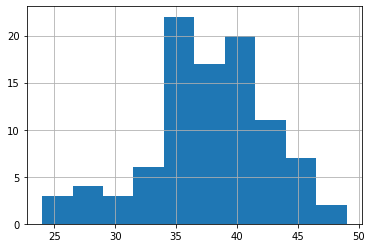

In [234]:
Data_experiment_DQII.DQII.hist()

In [235]:
#Data_experiment_DQII.to_csv('Data_experiment_DQII.csv')

## Adding Demographic questionnaire

In [236]:
Demo = pd.read_csv('./Data_experiment/data_exp_32771-v4_questionnaire-Demog.csv')

In [237]:
Demo.insert(61,'nb_meals',0)
Demo.insert(62,'time',0)
Demo.insert(63,'time_per_meals',0)
Demo['time']=pd.to_numeric(Demo.randomiser95hf.str.slice(stop=1))
Demo.loc[Demo.randomiser95hf.str.contains('10meal'),'nb_meals'] = 10
Demo.loc[Demo.randomiser95hf.str.contains('5meal'),'nb_meals'] = 5
Demo['time_per_meals'] = Demo.time.div(Demo.nb_meals)*60

In [238]:
Demo_simple = pd.DataFrame(Demo[['Participant Private ID','nb_meals','time','time_per_meals', 'Gender', 'Gender-quantised', 'Age', 'Age-quantised', 'Occupation', 'Occupation-quantised', 'Household', 'Household-quantised', 'Cook', 'Cook-quantised', 'Planner', 'Planner-quantised', 'SelfEfficacy', 'SelfEfficacy-quantised', 'IngredientsType', 'IngredientsType-quantised']])

In [239]:
Results_final = Data_experiment_DQII.join(Demo_simple.set_index('Participant Private ID'))

In [240]:
Results_final.to_csv('Results_final.csv')

# Exploratory Real-Time

In [271]:
Data_real_time=Data_experiment_raw[['Participant Private ID', 'Task Name', 'Zone Name', 'Reaction Time','Response']]
Data_real_time.columns = [c.replace(' ', '_') for c in Data_real_time.columns]
#Data_real_time=Data_real_time[Data_real_time.Zone_Name.str.startswith('Recipe').fillna(False)]
Participant_to_remove = Data_real_time[Data_real_time.Response == 'X'].Participant_Private_ID.unique()  #removing participants wiht missing entries
Data_real_time = Data_real_time[~Data_real_time.Participant_Private_ID.isin(Participant_to_remove)]
Data_real_time = Data_real_time[Data_real_time['Zone_Name'] == "Finish"]

In [274]:
Data_real_time['Reaction_Time'] = Data_real_time['Reaction_Time']/1000

In [278]:
Data_real_time_match = Data_real_time[['Participant_Private_ID','Reaction_Time']]

In [284]:
Result_real_time = Results_final.join(Data_real_time_match.set_index('Participant_Private_ID'))

In [285]:
Result_real_time.to_csv('Results_real_time.csv')